In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kalman as kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [2]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 10000

In [12]:
true_params = [r, 2.2, 0.01, 0.3, 0.6, 0.02]

In [13]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

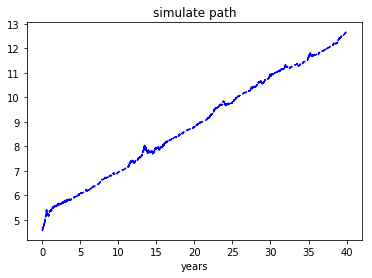

In [14]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[543]]


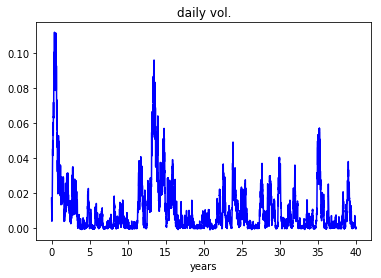

In [15]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# Optimization

In [16]:
def wrap_heston_obj(params, *args):
    y = args[0]
    S0 = args[1]
    return kf.ukf_heston_obj(y, params, S0)

In [17]:
num_iter = 1
def callbackF(xi):
    global num_iter
    global arg
    print('i: ' + str(num_iter))
    print('x_i: ' + str(xi))
    print('f_i: ' + str(wrap_heston_obj(xi, *args)))
    num_iter += 1

In [18]:
args = (np.array(y[0,:])[0], S0)

# Param Select

In [19]:
def param_select(params1, params2, n_alphas=1000):
    params1 = np.array(params1)
    params2 = np.array(params2)
    alphas = np.linspace(0, 1, n_alphas)
    params = [a*params1+(1-a)*params2 for a in alphas]
    objs = [wrap_heston_obj(p, *args) for p in params]
    return objs

In [20]:
init_params = [0.5, 0.8, 0.08, 0.4, -0.3, 0.23]
params2 = [0.2, 3.4, 0.05, 0.1, -0.05, 0.1]

In [23]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.5, 0.8, 0.08, 0.4, -0.3, 0.23]
True Params: [0.2, 2.2, 0.01, 0.3, 0.6, 0.02]


In [76]:
maxiter = 10000
xopt, fopt, _, _, _ = fmin(wrap_heston_obj, xopt, args=args, maxiter=maxiter, callback=callbackF, 
                           disp=True, retall=False, full_output=True)

i: 281
x_i: [ 0.86920922  2.44159029 -0.0380469   0.20233676 -0.42922433  0.27193249]
f_i: -9.36772197376267
i: 282
x_i: [ 0.86920922  2.44159029 -0.0380469   0.20233676 -0.42922433  0.27193249]
f_i: -9.36772197376267
i: 283
x_i: [ 0.86920922  2.44159029 -0.0380469   0.20233676 -0.42922433  0.27193249]
f_i: -9.36772197376267
i: 284
x_i: [ 0.89706034  2.46419761 -0.03590431  0.20211409 -0.42909403  0.27445038]
f_i: -9.368826609322184
i: 285
x_i: [ 0.89706034  2.46419761 -0.03590431  0.20211409 -0.42909403  0.27445038]
f_i: -9.368826609322184
i: 286
x_i: [ 0.87168017  2.55302089 -0.03687261  0.20114407 -0.43786789  0.25090877]
f_i: -9.37258631144211
i: 287
x_i: [ 0.87168017  2.55302089 -0.03687261  0.20114407 -0.43786789  0.25090877]
f_i: -9.37258631144211
i: 288
x_i: [ 0.87168017  2.55302089 -0.03687261  0.20114407 -0.43786789  0.25090877]
f_i: -9.37258631144211
i: 289
x_i: [ 0.87168017  2.55302089 -0.03687261  0.20114407 -0.43786789  0.25090877]
f_i: -9.37258631144211
i: 290
x_i: [ 0.8

f_i: -9.436943804626736
i: 356
x_i: [ 0.78368009  3.32691112 -0.02689506  0.21802367 -0.49139837  0.16331167]
f_i: -9.437048681087328
i: 357
x_i: [ 0.78368009  3.32691112 -0.02689506  0.21802367 -0.49139837  0.16331167]
f_i: -9.437048681087328
i: 358
x_i: [ 0.77743019  3.32837126 -0.02692401  0.21821314 -0.49199616  0.16349128]
f_i: -9.43708611024772
i: 359
x_i: [ 0.78519703  3.33371209 -0.02670681  0.21766423 -0.48832051  0.16527835]
f_i: -9.437170180348613
i: 360
x_i: [ 0.78100805  3.31142056 -0.0270695   0.21912526 -0.48816807  0.16126505]
f_i: -9.437216642977992
i: 361
x_i: [ 0.78874395  3.30367416 -0.02693185  0.21785047 -0.48141937  0.16581099]
f_i: -9.437313244721054
i: 362
x_i: [ 0.78502891  3.35242016 -0.02643057  0.21862858 -0.48238623  0.15854763]
f_i: -9.43760625373085
i: 363
x_i: [ 0.78502891  3.35242016 -0.02643057  0.21862858 -0.48238623  0.15854763]
f_i: -9.43760625373085
i: 364
x_i: [ 0.78502891  3.35242016 -0.02643057  0.21862858 -0.48238623  0.15854763]
f_i: -9.43760

f_i: -9.438818215521232
i: 431
x_i: [ 0.81068617  3.45632985 -0.02527905  0.22429251 -0.44947814  0.14775435]
f_i: -9.438984141894135
i: 432
x_i: [ 0.81623074  3.46969613 -0.02518508  0.22388219 -0.44622954  0.15297799]
f_i: -9.43904627320204
i: 433
x_i: [ 0.81623074  3.46969613 -0.02518508  0.22388219 -0.44622954  0.15297799]
f_i: -9.43904627320204
i: 434
x_i: [ 0.81623074  3.46969613 -0.02518508  0.22388219 -0.44622954  0.15297799]
f_i: -9.43904627320204
i: 435
x_i: [ 0.82794242  3.51834847 -0.02477204  0.22668214 -0.43408619  0.14672936]
f_i: -9.439101732712446
i: 436
x_i: [ 0.82794242  3.51834847 -0.02477204  0.22668214 -0.43408619  0.14672936]
f_i: -9.439101732712446
i: 437
x_i: [ 0.82794242  3.51834847 -0.02477204  0.22668214 -0.43408619  0.14672936]
f_i: -9.439101732712446
i: 438
x_i: [ 0.82505398  3.49710719 -0.02517449  0.22601793 -0.43579869  0.1528824 ]
f_i: -9.439459508990973
i: 439
x_i: [ 0.82505398  3.49710719 -0.02517449  0.22601793 -0.43579869  0.1528824 ]
f_i: -9.43945

f_i: -9.443628207021236
i: 506
x_i: [ 0.84502743  4.12611189 -0.02360813  0.24762989 -0.42609242  0.1901272 ]
f_i: -9.443628207021236
i: 507
x_i: [ 0.84502743  4.12611189 -0.02360813  0.24762989 -0.42609242  0.1901272 ]
f_i: -9.443628207021236
i: 508
x_i: [ 0.84877088  4.22634677 -0.02336528  0.25175119 -0.42610935  0.19534729]
f_i: -9.443881714433438
i: 509
x_i: [ 0.84877088  4.22634677 -0.02336528  0.25175119 -0.42610935  0.19534729]
f_i: -9.443881714433438
i: 510
x_i: [ 0.8414689   4.10866152 -0.02317053  0.24708565 -0.42123161  0.18833155]
f_i: -9.444107992616601
i: 511
x_i: [ 0.83227909  4.21521362 -0.02244185  0.2472284  -0.42908749  0.19894283]
f_i: -9.444349242997271
i: 512
x_i: [ 0.84783783  4.28966931 -0.02271876  0.25362054 -0.41464217  0.1995559 ]
f_i: -9.444671850953494
i: 513
x_i: [ 0.84783783  4.28966931 -0.02271876  0.25362054 -0.41464217  0.1995559 ]
f_i: -9.444671850953494
i: 514
x_i: [ 0.84174629  4.43629284 -0.02119932  0.25569796 -0.41515593  0.20616207]
f_i: -9.44

f_i: -9.448292838624086
i: 581
x_i: [ 0.78365342  4.92756514 -0.01834754  0.26705349 -0.40968345  0.27830717]
f_i: -9.448292838624086
i: 582
x_i: [ 0.78365342  4.92756514 -0.01834754  0.26705349 -0.40968345  0.27830717]
f_i: -9.448292838624086
i: 583
x_i: [ 0.78365342  4.92756514 -0.01834754  0.26705349 -0.40968345  0.27830717]
f_i: -9.448292838624086
i: 584
x_i: [ 0.78683172  4.93557623 -0.01848864  0.26804102 -0.40954082  0.27963633]
f_i: -9.448295610915064
i: 585
x_i: [ 0.78683172  4.93557623 -0.01848864  0.26804102 -0.40954082  0.27963633]
f_i: -9.448295610915064
i: 586
x_i: [ 0.78642212  4.86221402 -0.018729    0.26566155 -0.41202286  0.27607926]
f_i: -9.448310245482892
i: 587
x_i: [ 0.78642212  4.86221402 -0.018729    0.26566155 -0.41202286  0.27607926]
f_i: -9.448310245482892
i: 588
x_i: [ 0.78642212  4.86221402 -0.018729    0.26566155 -0.41202286  0.27607926]
f_i: -9.448310245482892
i: 589
x_i: [ 0.78642212  4.86221402 -0.018729    0.26566155 -0.41202286  0.27607926]
f_i: -9.44

f_i: -9.449637710983966
i: 656
x_i: [ 0.7962292   5.36241182 -0.01709152  0.27750927 -0.40003174  0.42826443]
f_i: -9.449637710983966
i: 657
x_i: [ 0.7962292   5.36241182 -0.01709152  0.27750927 -0.40003174  0.42826443]
f_i: -9.449637710983966
i: 658
x_i: [ 0.7962292   5.36241182 -0.01709152  0.27750927 -0.40003174  0.42826443]
f_i: -9.449637710983966
i: 659
x_i: [ 0.7962292   5.36241182 -0.01709152  0.27750927 -0.40003174  0.42826443]
f_i: -9.449637710983966
i: 660
x_i: [ 0.7962292   5.36241182 -0.01709152  0.27750927 -0.40003174  0.42826443]
f_i: -9.449637710983966
i: 661
x_i: [ 0.78867423  5.42451011 -0.01667759  0.27816752 -0.39845439  0.43811214]
f_i: -9.449669233060161
i: 662
x_i: [ 0.78867423  5.42451011 -0.01667759  0.27816752 -0.39845439  0.43811214]
f_i: -9.449669233060161
i: 663
x_i: [ 0.78867423  5.42451011 -0.01667759  0.27816752 -0.39845439  0.43811214]
f_i: -9.449669233060161
i: 664
x_i: [ 0.78867423  5.42451011 -0.01667759  0.27816752 -0.39845439  0.43811214]
f_i: -9.44

f_i: -9.44969461531709
i: 731
x_i: [ 0.78914427  5.44819798 -0.01674599  0.27854918 -0.40057209  0.45079569]
f_i: -9.44969461531709
i: 732
x_i: [ 0.78908979  5.45164396 -0.01673576  0.27864945 -0.40044772  0.45147459]
f_i: -9.449694622396754
i: 733
x_i: [ 0.78908979  5.45164396 -0.01673576  0.27864945 -0.40044772  0.45147459]
f_i: -9.449694622396754
i: 734
x_i: [ 0.78903749  5.45069396 -0.01673981  0.27863169 -0.40053052  0.45136641]
f_i: -9.449694625950029
i: 735
x_i: [ 0.78903749  5.45069396 -0.01673981  0.27863169 -0.40053052  0.45136641]
f_i: -9.449694625950029
i: 736
x_i: [ 0.78903749  5.45069396 -0.01673981  0.27863169 -0.40053052  0.45136641]
f_i: -9.449694625950029
i: 737
x_i: [ 0.78903749  5.45069396 -0.01673981  0.27863169 -0.40053052  0.45136641]
f_i: -9.449694625950029
i: 738
x_i: [ 0.78903749  5.45069396 -0.01673981  0.27863169 -0.40053052  0.45136641]
f_i: -9.449694625950029
i: 739
x_i: [ 0.78903749  5.45069396 -0.01673981  0.27863169 -0.40053052  0.45136641]
f_i: -9.4496

# Plot Results

In [77]:
x_preds, y_preds = kf.ukf_heston_obj(args[0], xopt, args[1], return_vals=True)

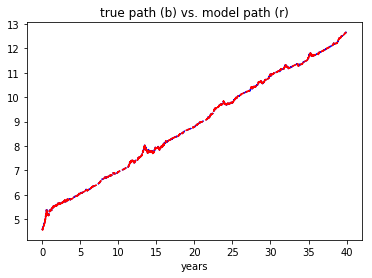

In [78]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_preds[1:], 'r--')
plt.title('true path (b) vs. model path (r)')
plt.xlabel('years')
plt.show()

# neg vol: [[543]]


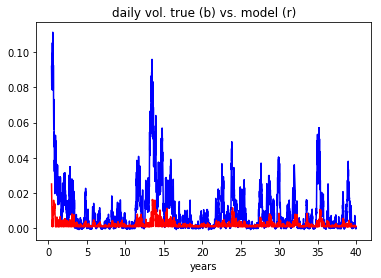

In [83]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years[100:], np.array(y[1,101:])[0], 'b-')
plt.plot(years[100:], x_preds[101:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()